### Healthy Living - Visualizing Daily Activity

In [1]:
import pandas as pd
import xmltodict
import calendar

In [2]:
input_path = 'apple_health_export/export.xml'
with open(input_path, 'r') as xml_file:
    input_data = xmltodict.parse(xml_file.read())

records_list = input_data['HealthData']['Record']
health_data = pd.DataFrame(records_list)

In [3]:
health_data.head()

,@type,@sourceName,@sourceVersion,@unit,@creationDate,@startDate,@endDate,@value,@device,MetadataEntry,HeartRateVariabilityMetadataList
0,HKQuantityTypeIdentifierHeight,Health,11.2.1,ft,2018-01-01 11:02:48 -0700,2018-01-01 11:02:48 -0700,2018-01-01 11:02:48 -0700,5.93832,NaN,NaN,NaN
1,HKQuantityTypeIdentifierHeight,Seven,8.0.4.6,ft,2018-12-27 07:10:05 -0700,2018-12-27 07:10:05 -0700,2018-12-27 07:10:05 -0700,5.90551,NaN,NaN,NaN
2,HKQuantityTypeIdentifierBodyMass,Health,11.2.1,lb,2018-01-01 11:02:48 -0700,2018-01-01 11:02:48 -0700,2018-01-01 11:02:48 -0700,141.096,NaN,NaN,NaN
3,HKQuantityTypeIdentifierBodyMass,Seven,8.0.4.6,lb,2018-12-27 07:10:01 -0700,2018-12-27 07:10:01 -0700,2018-12-27 07:10:01 -0700,147.71,NaN,NaN,NaN
4,HKQuantityTypeIdentifierHeartRate,Pratik’s Apple Watch,4.3.2,count/min,2019-01-12 03:10:45 -0700,2019-01-12 03:05:55 -0700,2019-01-12 03:05:55 -0700,94,"<<HKDevice: 0x280cd4d70>, name:Apple Watch, ma...",{'@key': 'HKMetadataKeyHeartRateMotionContext'...,NaN


In [4]:
health_data.columns

Index(['@type', '@sourceName', '@sourceVersion', '@unit', '@creationDate',
       '@startDate', '@endDate', '@value', '@device', 'MetadataEntry',
       'HeartRateVariabilityMetadataList'],
      dtype='object')

In [5]:
health_data['@type'].unique()

array(['HKQuantityTypeIdentifierHeight',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierHeadphoneAudioExposure',
       'HKCategoryTypeIdentifierSleepAnalysis',
       'HKCategoryTypeIdentifierAppleStandHour',
       'HKQuantityTypeIdentifierHeartRateVariabilitySDNN'], dtype=object)

In [6]:
health_data['@sourceName'].unique()

array(['Health', 'Seven', 'Pratik’s Apple\xa0Watch', 'iPhone',
       'Pratik’s iPhone', 'Runkeeper', 'Clock'], dtype=object)

In [7]:
health_data['@unit'].unique()

array(['ft', 'lb', 'count/min', 'count', 'mi', 'kcal', 'min', 'dBASPL',
       nan, 'ms'], dtype=object)

**Get data for each metric**

In [8]:
# format timestamp data

format = '%Y-%m-%d %H:%M:%S'
health_data['@creationDate'] = pd.to_datetime(health_data['@creationDate'],
                                     format=format)
health_data['@startDate'] = pd.to_datetime(health_data['@startDate'],
                                  format=format)
health_data['@endDate'] = pd.to_datetime(health_data['@endDate'],
                                format=format)

In [9]:
health_data.shape

(341647, 11)

In [10]:
# take data points between August 1st, 2019 and December 1st, 2019
start_date = '2019-08-01'
end_date = '2019-12-01'
fall_sem = (health_data['@creationDate'] >= start_date) & (health_data['@creationDate'] <= end_date)
health_data = health_data.loc[fall_sem]
health_data.loc[fall_sem].shape

(134039, 11)

In [11]:
heart_rate = health_data[health_data['@type'] == 'HKQuantityTypeIdentifierHeartRate']
heart_rate_variability_sdnn = health_data[health_data['@type'] == 'HKQuantityTypeIdentifierHeartRateVariabilitySDNN']
step_counts = health_data[health_data['@type'] == 'HKQuantityTypeIdentifierStepCount']
dist_walk_run = health_data[health_data['@type'] == 'HKQuantityTypeIdentifierDistanceWalkingRunning']
basal_energy_burnt = health_data[health_data['@type'] == 'HKQuantityTypeIdentifierBasalEnergyBurned']
active_energy_burnt = health_data[health_data['@type'] == 'HKQuantityTypeIdentifierActiveEnergyBurned']
flights_climbed = health_data[health_data['@type'] == 'HKQuantityTypeIdentifierFlightsClimbed']
exercise_time = health_data[health_data['@type'] == 'HKQuantityTypeIdentifierAppleExerciseTime']
headphone_audio_exposure = health_data[health_data['@type'] == 'HKQuantityTypeIdentifierHeadphoneAudioExposure']
sleep_analysis = health_data[health_data['@type'] == 'HKCategoryTypeIdentifierSleepAnalysis']
stand_hour = health_data[health_data['@type'] == 'HKCategoryTypeIdentifierAppleStandHour']

**Analyzing** `step_counts`

In [12]:
step_counts.loc[:, '@value'] = pd.to_numeric(
    step_counts.loc[:, '@value'])
step_counts_by_creation = step_counts.groupby('@creationDate').sum()

/Users/pratikrev/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [13]:
step_counts_by_creation.head()

,@value
@creationDate,
2019-08-01 00:12:06-07:00,40
2019-08-01 01:07:40-07:00,22
2019-08-01 01:17:13-07:00,25
2019-08-01 01:44:39-07:00,52
2019-08-01 01:56:08-07:00,16


In [14]:
by_day = step_counts_by_creation['@value'].resample('D').sum()
by_day.sort_values(ascending=False)[:5]

@creationDate
2019-11-23 00:00:00-07:00    33269
2019-08-16 00:00:00-07:00    33104
2019-09-07 00:00:00-07:00    32271
2019-09-08 00:00:00-07:00    31067
2019-09-26 00:00:00-07:00    26329
Name: @value, dtype: int64

In [15]:
# August - November
means_by_distinct_month = by_day.resample('M').mean()
means_by_distinct_month.sort_values(ascending=False)[:4]

@creationDate
2019-09-30 00:00:00-07:00    15083.500000
2019-08-31 00:00:00-07:00    13711.387097
2019-10-31 00:00:00-07:00    10182.677419
2019-11-30 00:00:00-07:00     9297.100000
Name: @value, dtype: float64

In [16]:
by_day[(by_day.index.year == 2019) & (by_day.index.month == 9)]

@creationDate
2019-09-01 00:00:00-07:00    16386
2019-09-02 00:00:00-07:00     6445
2019-09-03 00:00:00-07:00    12096
2019-09-04 00:00:00-07:00     4871
2019-09-05 00:00:00-07:00    16278
2019-09-06 00:00:00-07:00     8998
2019-09-07 00:00:00-07:00    32271
2019-09-08 00:00:00-07:00    31067
2019-09-09 00:00:00-07:00     8815
2019-09-10 00:00:00-07:00    26316
2019-09-11 00:00:00-07:00    13039
2019-09-12 00:00:00-07:00     8097
2019-09-13 00:00:00-07:00    10659
2019-09-14 00:00:00-07:00    17135
2019-09-15 00:00:00-07:00    15267
2019-09-16 00:00:00-07:00    10568
2019-09-17 00:00:00-07:00    17057
2019-09-18 00:00:00-07:00    10529
2019-09-19 00:00:00-07:00    11006
2019-09-20 00:00:00-07:00    13650
2019-09-21 00:00:00-07:00    16854
2019-09-22 00:00:00-07:00    11628
2019-09-23 00:00:00-07:00    20318
2019-09-24 00:00:00-07:00    18197
2019-09-25 00:00:00-07:00    17574
2019-09-26 00:00:00-07:00    26329
2019-09-27 00:00:00-07:00    19483
2019-09-28 00:00:00-07:00    10294
2019-0

In [17]:
means_by_month = means_by_distinct_month.groupby(
    means_by_distinct_month.index.month).mean()
means_by_month.index = list(calendar.month_name)[8:12]
means_by_month.plot(kind='bar')

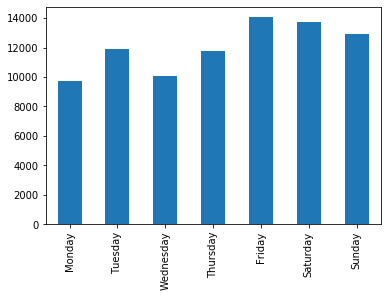

In [18]:
means_by_weekday = by_day.groupby(by_day.index.dayofweek).mean()
means_by_weekday.index = ['Monday', 'Tuesday',
                          'Wednesday', 'Thursday',
                          'Friday', 'Saturday',
                          'Sunday']   
means_by_weekday.plot(kind='bar')

In [19]:
heart_rate.loc[:, '@value'] = pd.to_numeric(
    heart_rate.loc[:, '@value'])
heart_rate_by_creation = heart_rate.groupby('@creationDate').mean()

/Users/pratikrev/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
heart_rate_by_creation.head()

,@value
@creationDate,
2019-08-01 00:00:44-07:00,74.0
2019-08-01 00:05:52-07:00,67.0
2019-08-01 00:11:58-07:00,65.0
2019-08-01 00:18:21-07:00,90.0
2019-08-01 00:20:39-07:00,66.0


In [21]:
# High heart rate
by_day = heart_rate_by_creation['@value'].resample('D').mean()
by_day.sort_values(ascending=False)[:5]

@creationDate
2019-09-07 00:00:00-07:00    121.209777
2019-10-13 00:00:00-07:00    113.333333
2019-08-07 00:00:00-07:00    112.000000
2019-11-29 00:00:00-07:00    102.129496
2019-11-23 00:00:00-07:00    102.033069
Name: @value, dtype: float64

In [22]:
# High heart rate
by_day = heart_rate_by_creation['@value'].resample('D').mean()
by_day.sort_values(ascending=True)[:5]

@creationDate
2019-08-01 00:00:00-07:00    71.464361
2019-10-25 00:00:00-07:00    71.661290
2019-09-16 00:00:00-07:00    71.794872
2019-11-08 00:00:00-07:00    73.024038
2019-10-28 00:00:00-07:00    73.641509
Name: @value, dtype: float64

In [23]:
means_by_distinct_month = by_day.resample('M').mean()
means_by_distinct_month.sort_values(ascending=False)

@creationDate
2019-11-30 00:00:00-07:00    84.285463
2019-09-30 00:00:00-07:00    83.514230
2019-08-31 00:00:00-07:00    83.482668
2019-10-31 00:00:00-07:00    81.086470
Name: @value, dtype: float64

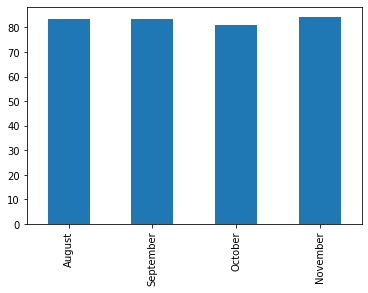

In [24]:
means_by_month = means_by_distinct_month.groupby(
    means_by_distinct_month.index.month).mean()
means_by_month.index = list(calendar.month_name)[8:12]
means_by_month.plot(kind='bar')

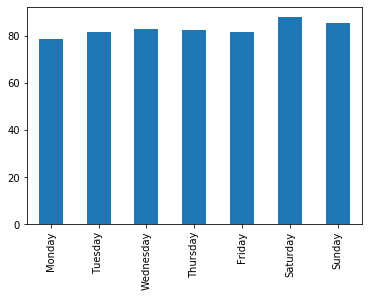

In [25]:
means_by_weekday = by_day.groupby(by_day.index.dayofweek).mean()
means_by_weekday.index = ['Monday', 'Tuesday',
                          'Wednesday', 'Thursday',
                          'Friday', 'Saturday',
                          'Sunday']   
means_by_weekday.plot(kind='bar')

In [26]:
# Workout data

workout_list = input_data['HealthData']['Workout']
health_data_workout = pd.DataFrame(workout_list)

health_data_workout.head()

,@workoutActivityType,@duration,@durationUnit,@totalDistance,@totalDistanceUnit,@totalEnergyBurned,@totalEnergyBurnedUnit,@sourceName,@sourceVersion,@creationDate,@startDate,@endDate,MetadataEntry,@device,WorkoutEvent
0,HKWorkoutActivityTypeHighIntensityIntervalTrai...,7.883333333333334,min,0,mi,102,kcal,Seven,8.0.4.6,2018-12-27 07:10:09 -0700,2018-12-27 07:01:34 -0700,2018-12-27 07:09:27 -0700,"[{'@key': 'HKGroupFitness', '@value': '0'}, {'...",NaN,NaN
1,HKWorkoutActivityTypeHighIntensityIntervalTrai...,7.933333333333334,min,0,mi,103,kcal,Seven,8.0.4.6,2018-12-27 07:19:01 -0700,2018-12-27 07:10:21 -0700,2018-12-27 07:18:17 -0700,"[{'@key': 'HKGroupFitness', '@value': '0'}, {'...",NaN,NaN
2,HKWorkoutActivityTypeHighIntensityIntervalTrai...,7.883333333333334,min,0,mi,96,kcal,Seven,8.0.4.6,2018-12-29 07:10:30 -0700,2018-12-29 07:00:36 -0700,2018-12-29 07:08:29 -0700,"[{'@key': 'HKGroupFitness', '@value': '0'}, {'...",NaN,NaN
3,HKWorkoutActivityTypeHighIntensityIntervalTrai...,8.083333333333334,min,0,mi,105,kcal,Seven,8.0.4.6,2018-12-29 07:20:11 -0700,2018-12-29 07:11:00 -0700,2018-12-29 07:19:05 -0700,"[{'@key': 'HKGroupFitness', '@value': '0'}, {'...",NaN,NaN
4,HKWorkoutActivityTypeHighIntensityIntervalTrai...,7.983333333333333,min,0,mi,91,kcal,Seven,8.0.4.6,2018-12-29 07:28:50 -0700,2018-12-29 07:20:51 -0700,2018-12-29 07:28:50 -0700,"[{'@key': 'HKGroupFitness', '@value': '0'}, {'...",NaN,NaN


In [27]:
health_data_workout.columns

Index(['@workoutActivityType', '@duration', '@durationUnit', '@totalDistance',
       '@totalDistanceUnit', '@totalEnergyBurned', '@totalEnergyBurnedUnit',
       '@sourceName', '@sourceVersion', '@creationDate', '@startDate',
       '@endDate', 'MetadataEntry', '@device', 'WorkoutEvent'],
      dtype='object')

In [28]:
health_data_workout['@workoutActivityType'].unique()

array(['HKWorkoutActivityTypeHighIntensityIntervalTraining',
       'HKWorkoutActivityTypeRunning', 'HKWorkoutActivityTypeOther',
       'HKWorkoutActivityTypeHiking'], dtype=object)

In [29]:
health_data_workout['@sourceName'].unique()

array(['Seven', 'Runkeeper', 'Pratik’s Apple\xa0Watch'], dtype=object)

In [30]:
health_data_workout['@durationUnit'].unique()

array(['min'], dtype=object)

**Get data for each metric**

In [31]:
# format timestamp data

format = '%Y-%m-%d %H:%M:%S'
health_data_workout['@creationDate'] = pd.to_datetime(health_data_workout['@creationDate'],
                                     format=format)
health_data_workout['@startDate'] = pd.to_datetime(health_data_workout['@startDate'],
                                  format=format)
health_data_workout['@endDate'] = pd.to_datetime(health_data_workout['@endDate'],
                                format=format)

In [32]:
health_data_workout.shape

(41, 15)

In [33]:
# take data points between August 1st, 2019 and December 1st, 2019
start_date = '2019-08-01'
end_date = '2019-12-01'
fall_sem = (health_data_workout['@creationDate'] >= start_date) & (health_data_workout['@creationDate'] <= end_date)
health_data_workout = health_data_workout.loc[fall_sem]
health_data_workout.loc[fall_sem].shape

(25, 15)

In [34]:
activity_running = health_data_workout[health_data_workout['@workoutActivityType'] == 'HKWorkoutActivityTypeRunning']
activity_hiking = health_data_workout[health_data_workout['@workoutActivityType'] == 'HKWorkoutActivityTypeHiking']

In [35]:
metrics = ['@duration','@totalDistance','@totalEnergyBurned']
for metric in metrics:
    activity_running.loc[:, metric] = pd.to_numeric(activity_running.loc[:, metric])
    activity_hiking.loc[:, metric] = pd.to_numeric(activity_hiking.loc[:, metric])
    
activity_running_by_creation = activity_running.groupby('@creationDate').mean()
activity_hiking_by_creation = activity_hiking.groupby('@creationDate').mean()

**Running data**

In [36]:
activity_running_by_creation.head()

,@duration,@totalDistance,@totalEnergyBurned
@creationDate,,,
2019-08-04 10:54:05-07:00,32.383317,3.310203,385.180691
2019-08-07 18:02:25-07:00,26.799983,2.749978,318.985482
2019-09-10 17:56:06-07:00,22.973747,2.166914,177.415000
2019-09-14 18:09:31-07:00,5.899139,0.582452,47.518000
2019-09-22 17:39:19-07:00,10.487199,1.010994,82.511000


In [37]:
# running by total distance
by_day = activity_running_by_creation['@totalDistance'].resample('D').mean()
by_day.sort_values(ascending=False)[:5]

@creationDate
2019-08-04 00:00:00-07:00    3.310203
2019-08-07 00:00:00-07:00    2.749978
2019-09-10 00:00:00-07:00    2.166914
2019-09-26 00:00:00-07:00    1.048091
2019-09-25 00:00:00-07:00    1.016268
Name: @totalDistance, dtype: float64

In [38]:
means_by_distinct_month = by_day.resample('M').mean()
means_by_distinct_month.sort_values(ascending=False)

@creationDate
2019-08-31 00:00:00-07:00    3.030091
2019-09-30 00:00:00-07:00    1.107171
2019-10-31 00:00:00-07:00    0.622946
Name: @totalDistance, dtype: float64

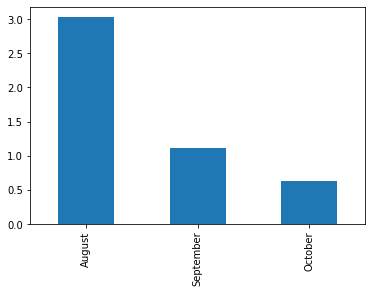

In [39]:
means_by_month = means_by_distinct_month.groupby(
    means_by_distinct_month.index.month).mean()
means_by_month.index = list(calendar.month_name)[8:11]
means_by_month.plot(kind='bar')

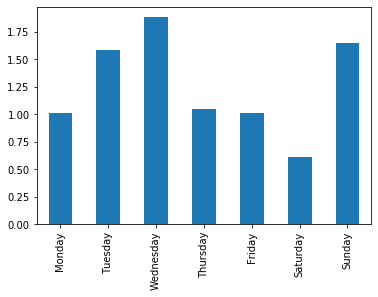

In [40]:
means_by_weekday = by_day.groupby(by_day.index.dayofweek).mean()
means_by_weekday.index = ['Monday', 'Tuesday',
                          'Wednesday', 'Thursday',
                          'Friday', 'Saturday',
                          'Sunday']   
means_by_weekday.plot(kind='bar')

**Hiking Data**

In [41]:
activity_hiking_by_creation.head()

,@duration,@totalDistance,@totalEnergyBurned
@creationDate,,,
2019-08-17 16:24:53-07:00,134.176196,0.000000,684.581000
2019-09-01 10:12:06-07:00,60.007283,0.000000,362.952000
2019-09-07 16:16:50-07:00,15.512026,0.000000,93.954000
2019-09-08 07:23:59-07:00,75.183117,2.827577,305.020357
2019-09-08 07:29:13-07:00,51.045472,0.000000,224.056000


In [42]:
# hiking by total distance
by_day = activity_hiking_by_creation['@totalDistance'].resample('D').mean()
by_day.sort_values(ascending=False)[:5]

@creationDate
2019-11-02 00:00:00-07:00    2.386730
2019-09-08 00:00:00-07:00    1.851905
2019-11-23 00:00:00-07:00    0.198080
2019-11-29 00:00:00-07:00    0.000000
2019-09-07 00:00:00-07:00    0.000000
Name: @totalDistance, dtype: float64

In [43]:
means_by_distinct_month = by_day.resample('M').mean()
means_by_distinct_month.sort_values(ascending=False)

@creationDate
2019-11-30 00:00:00-07:00    0.861603
2019-09-30 00:00:00-07:00    0.617302
2019-08-31 00:00:00-07:00    0.000000
2019-10-31 00:00:00-07:00         NaN
Name: @totalDistance, dtype: float64

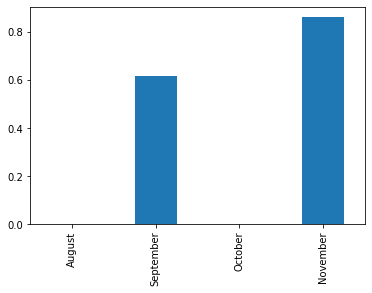

In [44]:
means_by_month = means_by_distinct_month.groupby(
    means_by_distinct_month.index.month).mean()
means_by_month.index = list(calendar.month_name)[8:12]
means_by_month.plot(kind='bar')

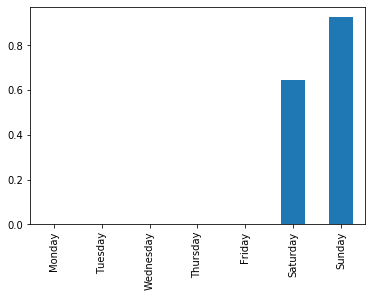

In [45]:
means_by_weekday = by_day.groupby(by_day.index.dayofweek).mean()
means_by_weekday.index = ['Monday', 'Tuesday',
                          'Wednesday', 'Thursday',
                          'Friday', 'Saturday',
                          'Sunday']   
means_by_weekday.plot(kind='bar')

In [46]:
# activity summary

activity_summary_list = input_data['HealthData']['ActivitySummary']
health_data_activity = pd.DataFrame(activity_summary_list)

health_data_activity.head()

,@dateComponents,@activeEnergyBurned,@activeEnergyBurnedGoal,@activeEnergyBurnedUnit,@appleExerciseTime,@appleExerciseTimeGoal,@appleStandHours,@appleStandHoursGoal
0,2019-01-11,0,0,kcal,0,30,0,12
1,2019-01-12,78.578,650,kcal,2,30,3,12
2,2019-01-13,267.696,650,kcal,23,30,5,12
3,2019-01-14,323.892,500,kcal,29,30,9,12
4,2019-01-15,233.621,400,kcal,15,30,10,12


In [47]:
health_data_activity.columns

Index(['@dateComponents', '@activeEnergyBurned', '@activeEnergyBurnedGoal',
       '@activeEnergyBurnedUnit', '@appleExerciseTime',
       '@appleExerciseTimeGoal', '@appleStandHours', '@appleStandHoursGoal'],
      dtype='object')

In [48]:
# format timestamp data

format = '%Y-%m-%d %H:%M:%S'
health_data_activity['@dateComponents'] = pd.to_datetime(health_data_activity['@dateComponents'],
                                     format=format)

In [49]:
health_data_activity.shape

(325, 8)

In [50]:
# take data points between August 1st, 2019 and December 1st, 2019
start_date = '2019-08-01'
end_date = '2019-11-30'
fall_sem = (health_data_activity['@dateComponents'] >= start_date) & (health_data_activity['@dateComponents'] <= end_date)
health_data_activity = health_data_activity.loc[fall_sem]
health_data_activity.loc[fall_sem].shape

(118, 8)

In [51]:
health_data_activity['@activeEnergyBurnedUnit'].unique()

array(['kcal'], dtype=object)

In [52]:
metrics = ['@activeEnergyBurned', '@activeEnergyBurnedGoal', '@appleExerciseTime',
           '@appleExerciseTimeGoal', '@appleStandHours', '@appleStandHoursGoal']
for metric in metrics:
    health_data_activity.loc[:, metric] = pd.to_numeric(health_data_activity.loc[:, metric])
    health_data_activity.loc[:, metric] = pd.to_numeric(health_data_activity.loc[:, metric])
    
health_data_activity_by_date = health_data_activity.groupby('@dateComponents').mean()

In [53]:
health_data_activity_by_date.head()

,@activeEnergyBurned,@activeEnergyBurnedGoal,@appleExerciseTime,@appleExerciseTimeGoal,@appleStandHours,@appleStandHoursGoal
@dateComponents,,,,,,
2019-08-01,143.088,300,3,30,3,12
2019-08-02,351.839,300,34,30,10,12
2019-08-03,276.225,300,18,30,9,12
2019-08-04,594.588,300,73,30,11,12
2019-08-05,114.219,300,10,30,5,12


In [54]:
means_by_distinct_month = health_data_activity_by_date['@activeEnergyBurned'].resample('M').mean()
means_by_distinct_month.sort_values(ascending=False)

@dateComponents
2019-09-30    410.901333
2019-08-31    335.455133
2019-11-30    294.834071
2019-10-31    281.548133
Name: @activeEnergyBurned, dtype: float64

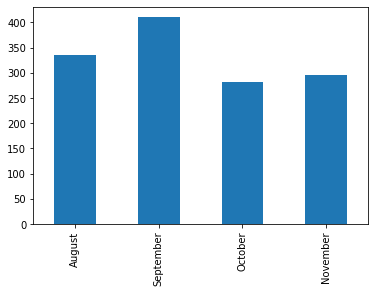

In [55]:
means_by_month = means_by_distinct_month.groupby(
    means_by_distinct_month.index.month).mean()
means_by_month.index = list(calendar.month_name)[8:12]
means_by_month.plot(kind='bar')

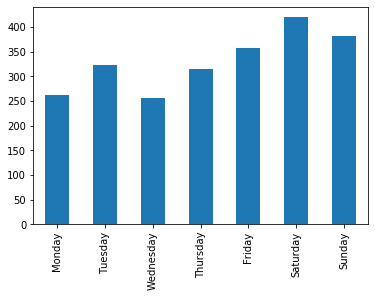

In [56]:
means_by_weekday = health_data_activity_by_date['@activeEnergyBurned'].groupby(health_data_activity_by_date['@activeEnergyBurned'].index.dayofweek).mean()
means_by_weekday.index = ['Monday', 'Tuesday',
                          'Wednesday', 'Thursday',
                          'Friday', 'Saturday',
                          'Sunday']   
means_by_weekday.plot(kind='bar')

In [57]:
data = [health_data_activity,health_data,health_data_workout]

In [58]:
for metric in data:
    print(metric, metric.shape)

    @dateComponents  @activeEnergyBurned  @activeEnergyBurnedGoal  \
199      2019-08-01              143.088                      300   
200      2019-08-02              351.839                      300   
201      2019-08-03              276.225                      300   
202      2019-08-04              594.588                      300   
203      2019-08-05              114.219                      300   
..              ...                  ...                      ...   
312      2019-11-24               91.715                      380   
313      2019-11-27                0.000                      380   
314      2019-11-28               69.608                      380   
315      2019-11-29              515.149                      380   
316      2019-11-30              199.493                      380   

    @activeEnergyBurnedUnit  @appleExerciseTime  @appleExerciseTimeGoal  \
199                    kcal                   3                      30   
200                  

In [59]:
for metric in data[1]:
    print(metric, m.shape)
print()
for metric in data[1]['@type'].unique():
    m = data[1][data[1]['@type'] == metric]
    print(metric, m.shape)

NameError: name 'm' is not defined

In [ ]:
for metric in data[2]:
    print(metric, m.shape)
print()
for metric in data[2]['@workoutActivityType'].unique():
    m = data[2][data[2]['@workoutActivityType'] == metric]
    print(metric, m.shape)

In [ ]:
health_data_activity.shape

In [ ]:
health_data_activity.to_csv('./components/data/activityData.csv', sep=',', encoding='utf-8', index=False)
health_data_workout.to_csv('./components/data/workoutData.csv', sep=',', encoding='utf-8', index=False)

In [ ]:
health_data['@type'].unique()

In [ ]:
health_data.shape

**Only take required fields**

In [63]:
health_data_record = health_data[health_data['@type'] == 'HKCategoryTypeIdentifierSleepAnalysis']
health_data_record = health_data_record[health_data_record['@type'] != 'HKCategoryTypeIdentifierAppleStandHour']
health_data_record.head()

,@type,@sourceName,@sourceVersion,@unit,@creationDate,@startDate,@endDate,@value,@device,MetadataEntry,HeartRateVariabilityMetadataList
338561,HKCategoryTypeIdentifierSleepAnalysis,Clock,NaN,NaN,2019-11-19 07:55:13-07:00,2019-11-18 23:50:00-07:00,2019-11-19 07:55:13-07:00,HKCategoryValueSleepAnalysisInBed,"<<HKDevice: 0x280f4cdc0>, name:iPhone, manufac...","{'@key': 'HKTimeZone', '@value': 'America/Denv...",NaN
338562,HKCategoryTypeIdentifierSleepAnalysis,Clock,NaN,NaN,2019-11-20 08:02:30-07:00,2019-11-20 01:39:21-07:00,2019-11-20 08:02:25-07:00,HKCategoryValueSleepAnalysisInBed,"<<HKDevice: 0x280f4ce10>, name:iPhone, manufac...","{'@key': 'HKTimeZone', '@value': 'America/Denv...",NaN
338563,HKCategoryTypeIdentifierSleepAnalysis,Clock,NaN,NaN,2019-11-21 07:10:02-07:00,2019-11-21 04:58:15-07:00,2019-11-21 07:09:57-07:00,HKCategoryValueSleepAnalysisInBed,"<<HKDevice: 0x280f4ce60>, name:iPhone, manufac...","{'@key': 'HKTimeZone', '@value': 'America/Denv...",NaN
338564,HKCategoryTypeIdentifierSleepAnalysis,Clock,NaN,NaN,2019-11-22 07:00:19-07:00,2019-11-22 01:08:09-07:00,2019-11-22 07:00:14-07:00,HKCategoryValueSleepAnalysisInBed,"<<HKDevice: 0x280f4ceb0>, name:iPhone, manufac...","{'@key': 'HKTimeZone', '@value': 'America/Denv...",NaN
338565,HKCategoryTypeIdentifierSleepAnalysis,Clock,NaN,NaN,2019-11-25 08:29:52-07:00,2019-11-25 01:00:27-07:00,2019-11-25 08:29:47-07:00,HKCategoryValueSleepAnalysisInBed,"<<HKDevice: 0x280f4cf00>, name:iPhone, manufac...","{'@key': 'HKTimeZone', '@value': 'America/Los_...",NaN


In [ ]:
health_data_record.to_csv('./components/data/recordData.csv', sep=',', encoding='utf-8', index=False)